In [1]:
import re

import pandas as pd

In [2]:
#df_original = pd.read_csv("scraped/sales_data.csv")
#df1 = pd.read_csv("../datacamp/listings_data_basic.csv")
df1 = pd.read_csv("scraped/listings_data_basic.csv")
df1

,ids,Links,Address,Description,Price,version,borough
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')"
1,104489204,https://www.rightmove.co.uk/properties/1044892...,"High Street, Sutton",2 bedroom maisonette for sale,330000.0,v0007_170622,"('Sutton', '5E93974')"
2,104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')"
3,104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')"
4,107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')"
...,...,...,...,...,...,...,...
779,96646042,https://www.rightmove.co.uk/properties/9664604...,"Buckland Way, Worcester Park, Surrey, KT4",2 bedroom terraced house for sale,425000.0,NaN,NaN
780,96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')"
781,96654763,https://www.rightmove.co.uk/properties/9665476...,"London Road, Mitcham Junction",3 bedroom link detached house for sale,500000.0,v0007_170622,"('Sutton', '5E93974')"
782,97404863,https://www.rightmove.co.uk/properties/9740486...,"Brook Court, 78 Wordsworth Drive, Sutton, SM3",1 bedroom apartment for sale,175000.0,v0007_170622,"('Sutton', '5E93974')"


In [3]:
#df2 = pd.read_csv("../datacamp/listings_data_enriched.csv")
df2 = pd.read_csv("scraped/listings_data_enriched.csv")
df2

,ids,version,link,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description
0,123510599,v0001_130622,--,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85572123,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85701084,v0001_130622,--,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80180424,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96572116,v0001_130622,--,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,123853646,v0007_170622,https://www.rightmove.co.uk/properties/123853646,0.4,Semi-Detached,4.0,1.0,NaN,NaN,Convenient location;Four bedrooms;Two receptio...,"[(0.4, 'Cheam Station', 'svg-nationalrail'), (...",Tenure: Freehold,Read more,Cromwells are pleased to offer to the market t...
836,85096869,v0007_170622,https://www.rightmove.co.uk/properties/85096869,0.1,Flat,2.0,1.0,530 sq. ft.;(49 sq. m.),NaN,Superb 2 bedroom apartment set on the 3rd floo...,"[(0.1, 'Sutton (Surrey) Station', 'svg-nationa...",Tenure: Leasehold,Read more,Set on the 3rd floor of this fantastic develop...
837,123624503,v0007_170622,https://www.rightmove.co.uk/properties/123624503,0.1,Apartment,2.0,1.0,NaN,NaN,Retirement living – 65 years and over;Fitness ...,"[(0.1, 'Hackbridge Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Retirement Homes that stand apart! A home is s...
838,123640691,v0007_170622,https://www.rightmove.co.uk/properties/123640691,0.5,Detached,6.0,2.0,NaN,NaN,Substantial SIX bedroom TWO bathroom THREE rec...,"[(0.5, 'Cheam Station', 'svg-nationalrail'), (...",Tenure: Freehold,Read more,This spacious SIX double bedroom TWO-bathroom ...


In [4]:
df_original = df1.merge(df2, left_on='ids',right_on='ids', suffixes=('_head','_indiv'))
df_original

,ids,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,type,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,Apartment,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,Flat,1.0,1.0,469 sq. ft.;(44 sq. m.),{},NaN,NaN,NaN,NaN,NaN
2,104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,Apartment,2.0,2.0,786 sq. ft.;(73 sq. m.),NaN,NaN,NaN,NaN,NaN,NaN
3,107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,Retirement Property,1.0,1.0,NaN,NaN,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...
4,109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0006_160622,https://www.rightmove.co.uk/properties/109078397,0.0,Apartment,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96649792,0.5,Flat,2.0,2.0,NaN,NaN,10 year build guarantee;CCTV communal areas;Al...,"[(0.5, 'Sutton (Surrey) Station', 'svg-nationa...",NaN,Read more,Tenure: Please confirm if this is a freehold ...
836,96654763,https://www.rightmove.co.uk/properties/9665476...,"London Road, Mitcham Junction",3 bedroom link detached house for sale,500000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96654763,0.4,Link Detached House,3.0,1.0,NaN,NaN,Character Link Detached House;Three Bedrooms;R...,"[(0.4, 'Hackbridge Station', 'svg-nationalrail...",Tenure: Freehold,Read more,An opportunity to acquire a character three...
837,99839117,https://www.rightmove.co.uk/properties/9983911...,"Barbican, London, EC2Y",Studio flat for sale,549950.0,v0007_170622,"('City of London', '5E61224')",v0000_160622,https://www.rightmove.co.uk/properties/99839117,0.1,Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,99839117,https://www.rightmove.co.uk/properties/9983911...,"Barbican, London, EC2Y",Studio flat for sale,549950.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/99839117,0.1,Studio,NaN,NaN,NaN,NaN,NaN,"[(0.1, 'Barbican Station', 'svg-nationalrail;s...",NaN,NaN,NaN


In [5]:
m = re.finditer(r'.*?(spark).*?', "I'm searching for a spark in PySpark", re.I)
for match in m:
    print(match)

<re.Match object; span=(0, 25), match="I'm searching for a spark">
<re.Match object; span=(25, 36), match=' in PySpark'>


In [6]:
#status_pattern = r'\s(\d{2})\s'

In [7]:
# m = re.finditer(r'.*?(spark).*?', df_original["Address"], re.I)
# for match in m:
#     print(match)

In [8]:
# df_original['titles'] = df_original['Address'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
# df_original['titles1'] = df_original['Address'].str.split('(', 1).str[0].str.strip()
# df_original['titles2'] = df_original['Address'].str.replace(r'\([^)]*\)', '').str.strip()
# df_original['bedrooms'] = df_original['Address'].str.extract('(bedroom)')
# df_original

In [9]:
#df_original = pd.read_csv("scraped/sales_data.csv")
#df_original["bedroom_count"] = df_original["Description"].str[0]
#df_original['bedrooms'] = df_original['Description'].str.extract('(\d) bedroom')
df_original['bedrooms'] = df_original['Description'].str.extract('(\d) bedroom').astype('float')
df_original['postcode'] = df_original["Address"].str.extract("([A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}|[A-Z]{1,2}\d[A-Z\d]?)")
df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette)")
df_original['compass'] = df_original["postcode"].str[0:2]
df_original['sq_ft'] = df_original["size"].str.extract("(\d*) sq. ft.")

df_original['hold_type2'] = df_original["hold_type"].str.replace("Tenure:","").str.strip()
#df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette|property)")
df_original

,ids,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,...,other_key_info,bullet_points,station_info,hold_type,short_description,long_description,postcode,compass,sq_ft,hold_type2
0,102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN
1,104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,...,{},NaN,NaN,NaN,NaN,NaN,EC4A,EC,469,NaN
2,104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC1N,EC,786,NaN
3,107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,...,NaN,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,NaN,NaN,NaN,Leasehold
4,109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0006_160622,https://www.rightmove.co.uk/properties/109078397,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96649792,0.5,...,NaN,10 year build guarantee;CCTV communal areas;Al...,"[(0.5, 'Sutton (Surrey) Station', 'svg-nationa...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN
836,96654763,https://www.rightmove.co.uk/properties/9665476...,"London Road, Mitcham Junction",3 bedroom link detached house for sale,500000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96654763,0.4,...,NaN,Character Link Detached House;Three Bedrooms;R...,"[(0.4, 'Hackbridge Station', 'svg-nationalrail...",Tenure: Freehold,Read more,An opportunity to acquire a character three...,NaN,NaN,NaN,Freehold
837,99839117,https://www.rightmove.co.uk/properties/9983911...,"Barbican, London, EC2Y",Studio flat for sale,549950.0,v0007_170622,"('City of London', '5E61224')",v0000_160622,https://www.rightmove.co.uk/properties/99839117,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN
838,99839117,https://www.rightmove.co.uk/properties/9983911...,"Barbican, London, EC2Y",Studio flat for sale,549950.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/99839117,0.1,...,NaN,NaN,"[(0.1, 'Barbican Station', 'svg-nationalrail;s...",NaN,NaN,NaN,EC2Y,EC,NaN,NaN


In [10]:
#df_original['Target'] = df_original['Price'].fillna(0.0).str.replace('[£,]', '').replace('POA', 0.0).astype('float')
df_original.set_index("ids", inplace=True)
df_original = df_original[~df_original.index.duplicated(keep='last')]

df_original['Target'] = df_original['Price'].fillna(0.0)
df_original

/tmp/ipykernel_3552/2157693824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Target'] = df_original['Price'].fillna(0.0)


,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,type,...,bullet_points,station_info,hold_type,short_description,long_description,postcode,compass,sq_ft,hold_type2,Target
ids,,,,,,,,,,,,,,,,,,,,,
102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN,3500000.0
104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,flat,...,NaN,NaN,NaN,NaN,NaN,EC4A,EC,469,NaN,630000.0
104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC1N,EC,786,NaN,1600000.0
107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,NaN,...,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,NaN,NaN,NaN,Leasehold,169950.0
109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/109078397,0.0,apartment,...,Apartment;2 Beds;1 Reception;2 Bathrooms;Showe...,"[(0.0, 'Liverpool Street Station', 'svg-nation...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,POA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96645682,https://www.rightmove.co.uk/properties/9664568...,"Jefton Court, Ross Road, Wallington, SM6",2 bedroom apartment for sale,285000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96645682,0.2,apartment,...,Ideally situated for transport links;Ground fl...,"[(0.2, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,"This two bedroom, ground floor purpose built a...",SM6,SM,NaN,Leasehold,285000.0
96646042,https://www.rightmove.co.uk/properties/9664604...,"Buckland Way, Worcester Park, Surrey, KT4",2 bedroom terraced house for sale,425000.0,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/96646042,0.7,house,...,ENTRANCE HALLWAY;LOUNGE;UPSTAIRS BATHROOM;DOUB...,"[(0.7, 'Worcester Park Station', 'svg-national...",Tenure: Freehold,Read more,ENTRANCE HALLWAY\r Understairs meter storage c...,KT4,KT,NaN,Freehold,425000.0
96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96649792,0.5,flat,...,10 year build guarantee;CCTV communal areas;Al...,"[(0.5, 'Sutton (Surrey) Station', 'svg-nationa...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,565000.0


In [11]:
# method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
# method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
#                if re.search(method_uri_protocol_pattern, item)
#                else 'no match'
#               for item in sample_logs]
# method_uri_protocol

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


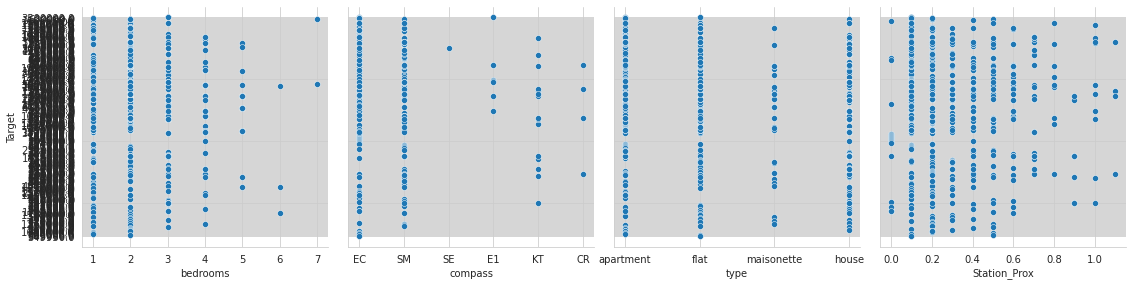

In [12]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_original, x_vars=['bedrooms', 'postcode','type'],
sns.pairplot(df_original, x_vars=['bedrooms', 'compass','type','Station_Prox'],
             y_vars='Target', size=4, aspect=1, kind='scatter')
plt.show()

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


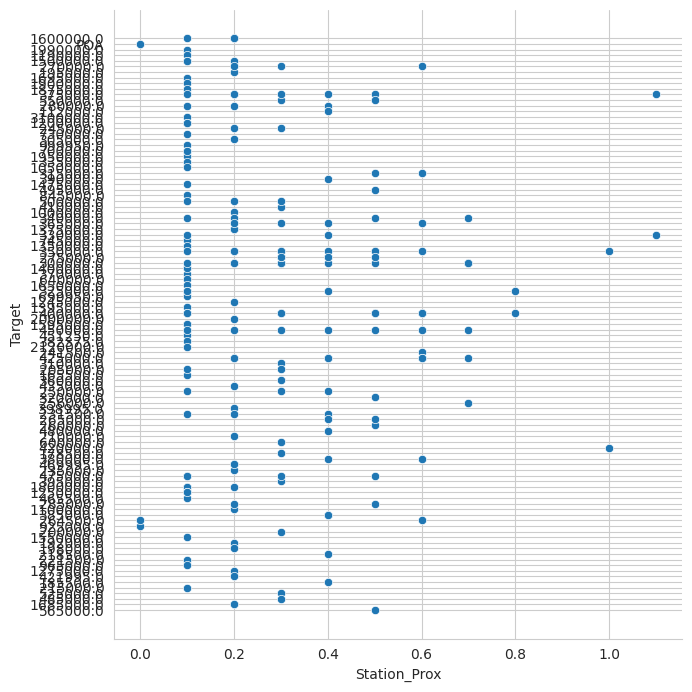

In [13]:
sns.pairplot(df_original[df_original['bedrooms'] == 2], x_vars=['Station_Prox'],
             y_vars='Target', size=7, aspect=1, kind='scatter')
plt.show()

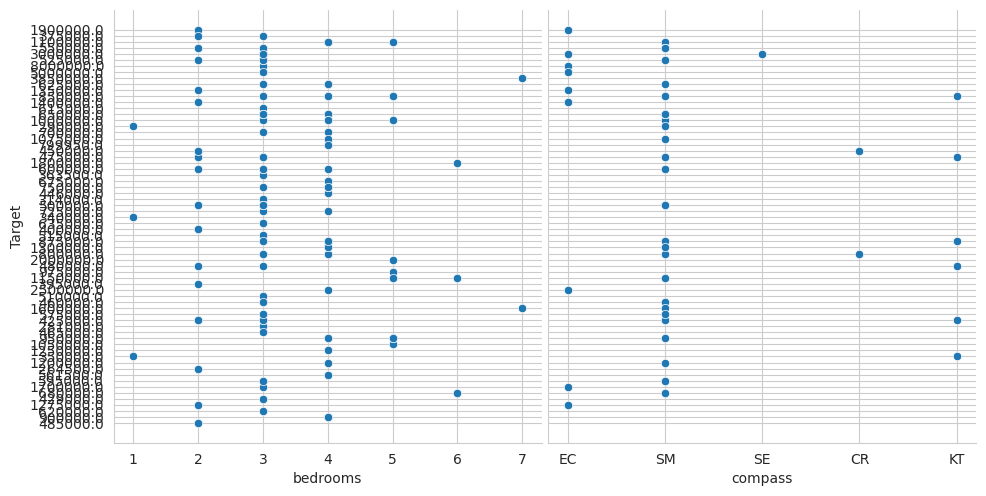

In [14]:
sns.pairplot(df_original[df_original["type"] == "house"], x_vars=['bedrooms', 'compass'],
             y_vars='Target', height=5, aspect=1, kind='scatter')
plt.show()

In [15]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 102189851 to 99839117
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Links              555 non-null    object 
 1   Address            555 non-null    object 
 2   Description        555 non-null    object 
 3   Price              555 non-null    object 
 4   version_head       494 non-null    object 
 5   borough            494 non-null    object 
 6   version_indiv      555 non-null    object 
 7   link               555 non-null    object 
 8   Station_Prox       555 non-null    float64
 9   type               532 non-null    object 
 10  bedrooms           518 non-null    float64
 11  bathrooms          515 non-null    float64
 12  size               71 non-null     object 
 13  other_key_info     46 non-null     object 
 14  bullet_points      364 non-null    object 
 15  station_info       409 non-null    object 
 16  hold_type    

In [16]:
df_original.describe()


,Station_Prox,bedrooms,bathrooms
count,555.000000,518.000000,515.000000
mean,0.315856,2.214286,1.411650
std,0.235559,1.118868,0.714946
min,0.000000,1.000000,1.000000
25%,0.100000,1.000000,1.000000
50%,0.200000,2.000000,1.000000
75%,0.500000,3.000000,2.000000
max,1.100000,7.000000,6.000000


array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>, <AxesSubplot:>]],
      dtype=object)

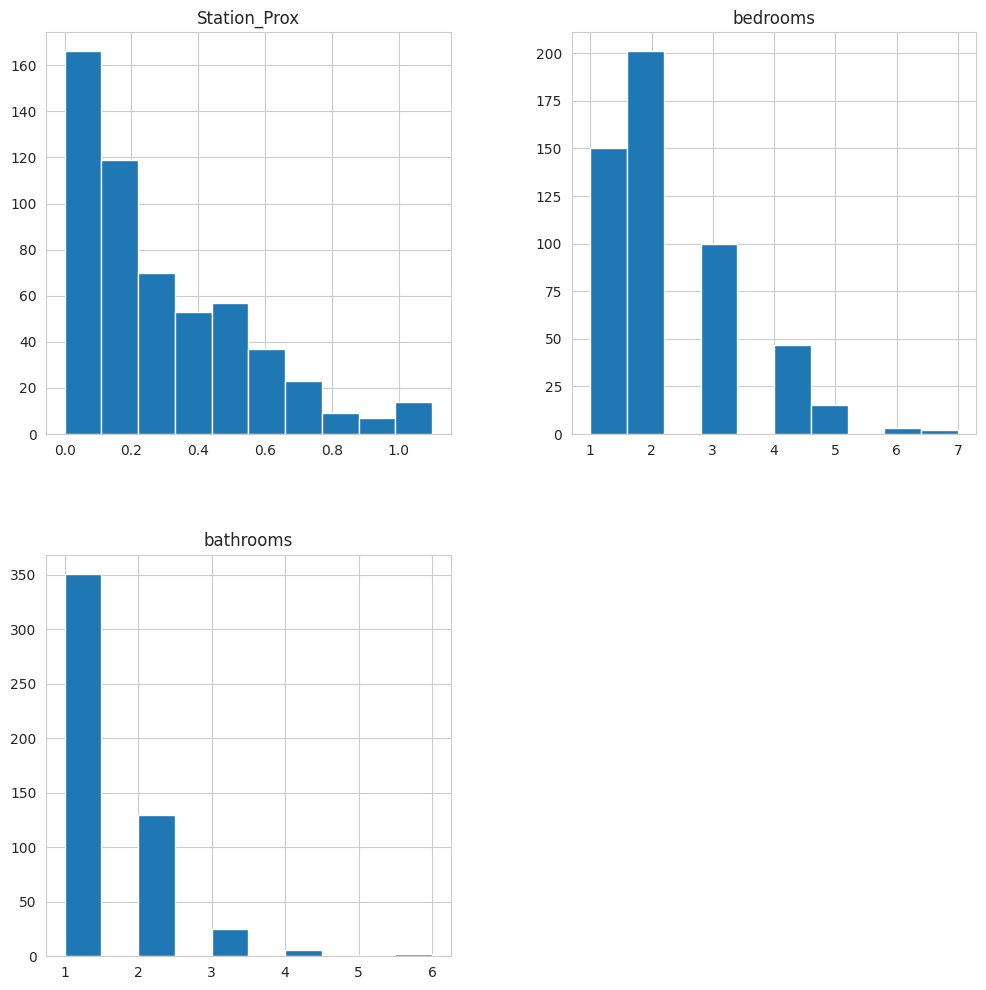

In [17]:
df_original.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'Station_Prox'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>, <AxesSubplot:>]],
      dtype=object)

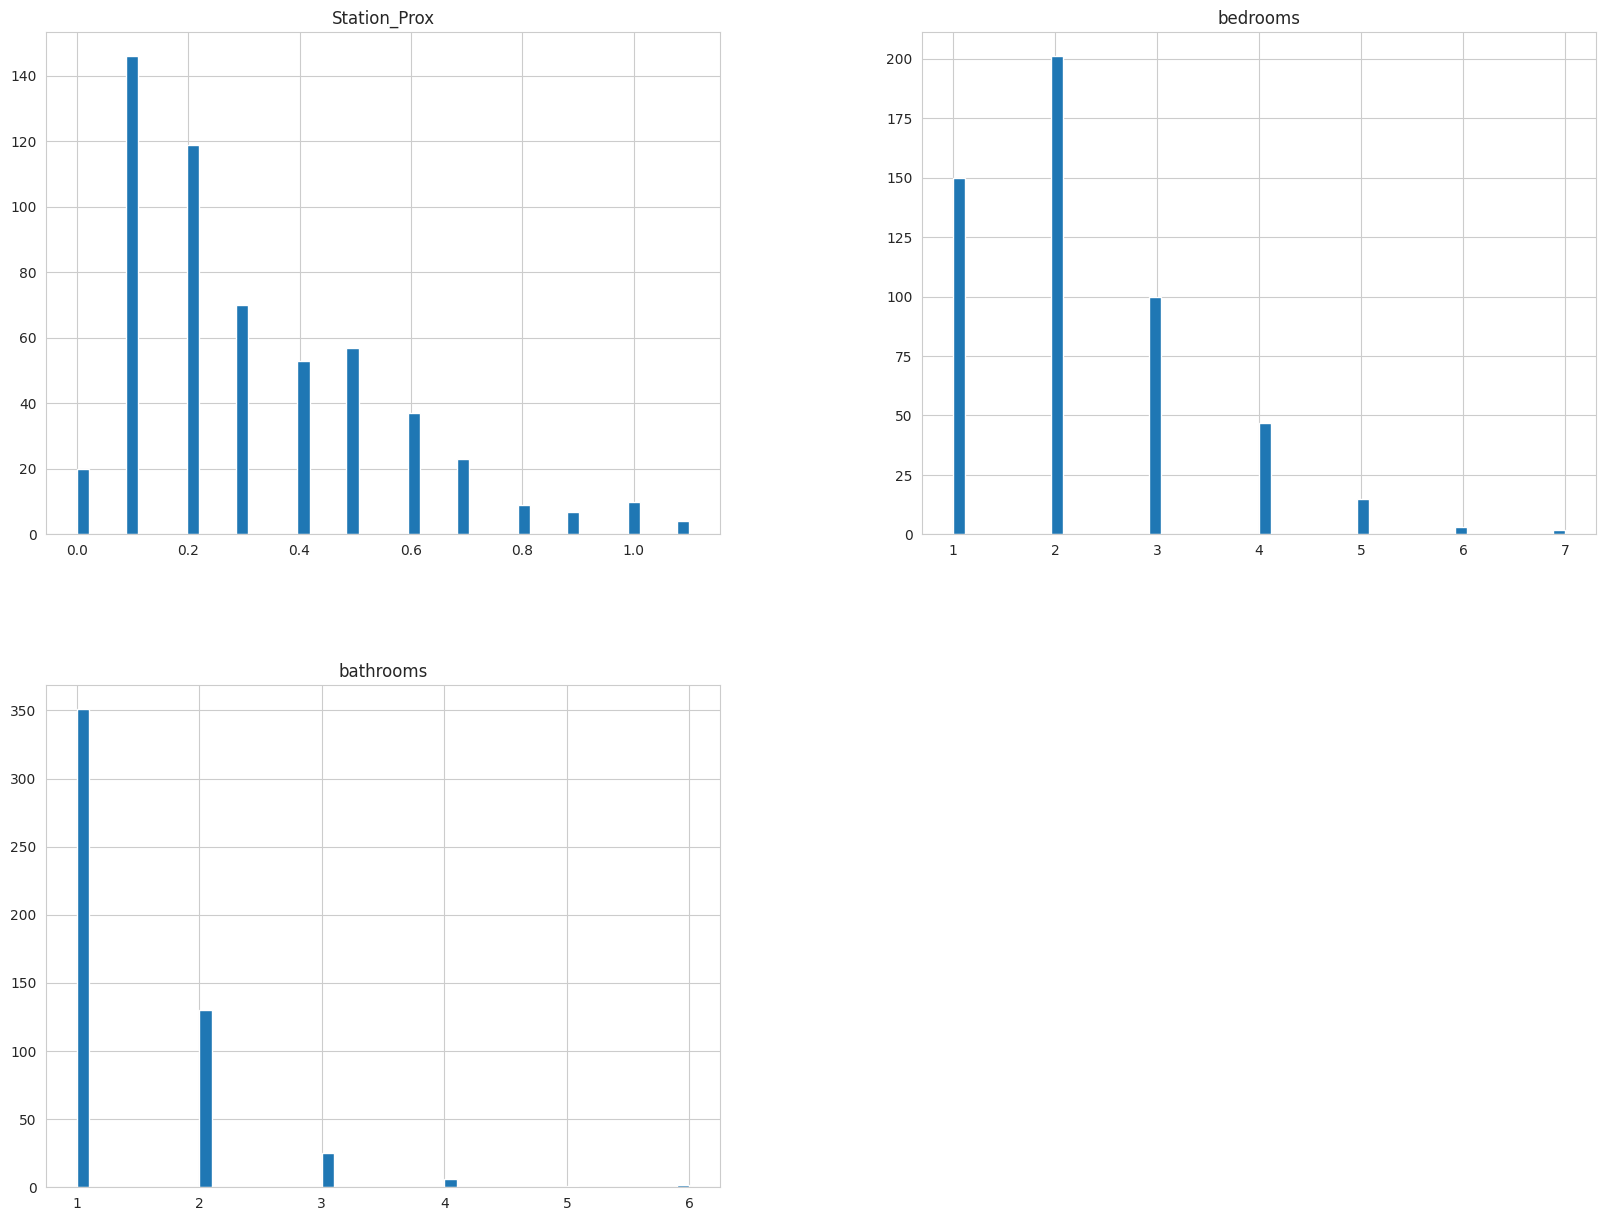

In [18]:
df_original.hist(bins=50, figsize=(20,15))

In [19]:
df_original["postcode"].value_counts()

SM6         31
SM1         29
EC2Y        26
SM2         25
EC4A        17
EC1A        17
EC3R        16
KT4         13
SM3         13
SM5         10
EC4V        10
EC2          8
E1           8
EC1N         7
EC3N         6
EC3A         5
SM6 7AX      4
EC2M         4
EC1          3
EC4Y         3
SM2 5LP      2
EC1M         2
CR4          2
SM5 3ES      1
EC1A 9LJ     1
SM5 1NZ      1
SM5 2LN      1
EC4V 3PS     1
SM2 5DJ      1
SM6 8TB      1
SM6 7GD      1
CR8          1
EC4          1
KT4 8QF      1
CR0          1
KT4 8HF      1
EC3A 7AB     1
SM6 8QP      1
EC4M         1
EC2N         1
SE1          1
SM5 2PS      1
EC2A         1
EC1V         1
Name: postcode, dtype: int64

In [20]:
df_original["type"].value_counts()

flat          180
apartment     164
house         157
maisonette     31
Name: type, dtype: int64

In [21]:
df_original.iloc[:,:-1].shape
df_original.iloc[:,-1].shape
df_original["Target"].shape

(555,)

In [22]:
df_original

,Links,Address,Description,Price,version_head,borough,version_indiv,link,Station_Prox,type,...,bullet_points,station_info,hold_type,short_description,long_description,postcode,compass,sq_ft,hold_type2,Target
ids,,,,,,,,,,,,,,,,,,,,,
102189851,https://www.rightmove.co.uk/properties/1021898...,"Roman House, Barbican, EC2Y",3 bedroom apartment for sale,3500000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/102189851,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC2Y,EC,NaN,NaN,3500000.0
104567108,https://www.rightmove.co.uk/properties/1045671...,"Breams Buildings, City, London, EC4A",1 bedroom flat for sale,630000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104567108,0.2,flat,...,NaN,NaN,NaN,NaN,NaN,EC4A,EC,469,NaN,630000.0
104639057,https://www.rightmove.co.uk/properties/1046390...,"Dyer's Buildings, Holborn, EC1N",2 bedroom apartment for sale,1600000.0,v0007_170622,"('City of London', '5E61224')",v0006_160622,https://www.rightmove.co.uk/properties/104639057,0.1,apartment,...,NaN,NaN,NaN,NaN,NaN,EC1N,EC,786,NaN,1600000.0
107158745,https://www.rightmove.co.uk/properties/1071587...,"Bramble Lodge, Wallington",1 bedroom retirement property for sale,169950.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/107158745,0.4,NaN,...,One bedroom first floor apartment;Fantastic or...,"[(0.4, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,Stratton and King are delighted to be marketin...,NaN,NaN,NaN,Leasehold,169950.0
109078397,https://www.rightmove.co.uk/properties/1090783...,"Liverpool Street, Liverpool Street",2 bedroom apartment for sale,POA,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/109078397,0.0,apartment,...,Apartment;2 Beds;1 Reception;2 Bathrooms;Showe...,"[(0.0, 'Liverpool Street Station', 'svg-nation...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,POA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96645682,https://www.rightmove.co.uk/properties/9664568...,"Jefton Court, Ross Road, Wallington, SM6",2 bedroom apartment for sale,285000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96645682,0.2,apartment,...,Ideally situated for transport links;Ground fl...,"[(0.2, 'Wallington Station', 'svg-nationalrail...",Tenure: Leasehold,Read more,"This two bedroom, ground floor purpose built a...",SM6,SM,NaN,Leasehold,285000.0
96646042,https://www.rightmove.co.uk/properties/9664604...,"Buckland Way, Worcester Park, Surrey, KT4",2 bedroom terraced house for sale,425000.0,NaN,NaN,v0007_170622,https://www.rightmove.co.uk/properties/96646042,0.7,house,...,ENTRANCE HALLWAY;LOUNGE;UPSTAIRS BATHROOM;DOUB...,"[(0.7, 'Worcester Park Station', 'svg-national...",Tenure: Freehold,Read more,ENTRANCE HALLWAY\r Understairs meter storage c...,KT4,KT,NaN,Freehold,425000.0
96649792,https://www.rightmove.co.uk/properties/9664979...,"Langley Park Road, South Sutton",2 bedroom flat for sale,565000.0,v0007_170622,"('Sutton', '5E93974')",v0007_170622,https://www.rightmove.co.uk/properties/96649792,0.5,flat,...,10 year build guarantee;CCTV communal areas;Al...,"[(0.5, 'Sutton (Surrey) Station', 'svg-nationa...",NaN,Read more,Tenure: Please confirm if this is a freehold ...,NaN,NaN,NaN,NaN,565000.0


In [23]:
#df_original.drop("Links")
df = df_original.copy()
df = df.drop(['Links','Address','Description','Price','postcode'], axis=1)
df = df.drop(['version_head','version_indiv','link','borough','other_key_info','bullet_points','station_info'], axis=1)
df = df.drop(['short_description','long_description','hold_type','size'], axis=1)
df

,Station_Prox,type,bedrooms,bathrooms,compass,sq_ft,hold_type2,Target
ids,,,,,,,,
102189851,0.1,apartment,3.0,3.0,EC,NaN,NaN,3500000.0
104567108,0.2,flat,1.0,1.0,EC,469,NaN,630000.0
104639057,0.1,apartment,2.0,2.0,EC,786,NaN,1600000.0
107158745,0.4,NaN,1.0,1.0,NaN,NaN,Leasehold,169950.0
109078397,0.0,apartment,2.0,2.0,NaN,NaN,NaN,POA
...,...,...,...,...,...,...,...,...
96645682,0.2,apartment,2.0,1.0,SM,NaN,Leasehold,285000.0
96646042,0.7,house,2.0,1.0,KT,NaN,Freehold,425000.0
96649792,0.5,flat,2.0,2.0,NaN,NaN,NaN,565000.0


In [24]:
for column in ['type','compass','hold_type2']:
    df = pd.concat([df,pd.get_dummies(df[column], prefix=column)],axis=1)
    # now drop the original column (you don't need it anymore)
    df.drop([column],axis=1, inplace=True)
df

,Station_Prox,bedrooms,bathrooms,sq_ft,Target,type_apartment,type_flat,type_house,type_maisonette,compass_CR,compass_E1,compass_EC,compass_KT,compass_SE,compass_SM,hold_type2_Freehold,hold_type2_Leasehold,hold_type2_Share of Freehold
ids,,,,,,,,,,,,,,,,,,
102189851,0.1,3.0,3.0,NaN,3500000.0,1,0,0,0,0,0,1,0,0,0,0,0,0
104567108,0.2,1.0,1.0,469,630000.0,0,1,0,0,0,0,1,0,0,0,0,0,0
104639057,0.1,2.0,2.0,786,1600000.0,1,0,0,0,0,0,1,0,0,0,0,0,0
107158745,0.4,1.0,1.0,NaN,169950.0,0,0,0,0,0,0,0,0,0,0,0,1,0
109078397,0.0,2.0,2.0,NaN,POA,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96645682,0.2,2.0,1.0,NaN,285000.0,1,0,0,0,0,0,0,0,0,1,0,1,0
96646042,0.7,2.0,1.0,NaN,425000.0,0,0,1,0,0,0,0,1,0,0,1,0,0
96649792,0.5,2.0,2.0,NaN,565000.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
if False:
    df.dropna(inplace=True)
    df

In [26]:
X = df.drop(["Target"],axis=1)
y = df["Target"]
X,y

(           Station_Prox  bedrooms  bathrooms sq_ft  type_apartment  type_flat  \
 ids                                                                             
 102189851           0.1       3.0        3.0   NaN               1          0   
 104567108           0.2       1.0        1.0   469               0          1   
 104639057           0.1       2.0        2.0   786               1          0   
 107158745           0.4       1.0        1.0   NaN               0          0   
 109078397           0.0       2.0        2.0   NaN               1          0   
 ...                 ...       ...        ...   ...             ...        ...   
 96645682            0.2       2.0        1.0   NaN               1          0   
 96646042            0.7       2.0        1.0   NaN               0          0   
 96649792            0.5       2.0        2.0   NaN               0          1   
 96654763            0.4       3.0        1.0   NaN               0          0   
 99839117       

# Exploratory Analysis

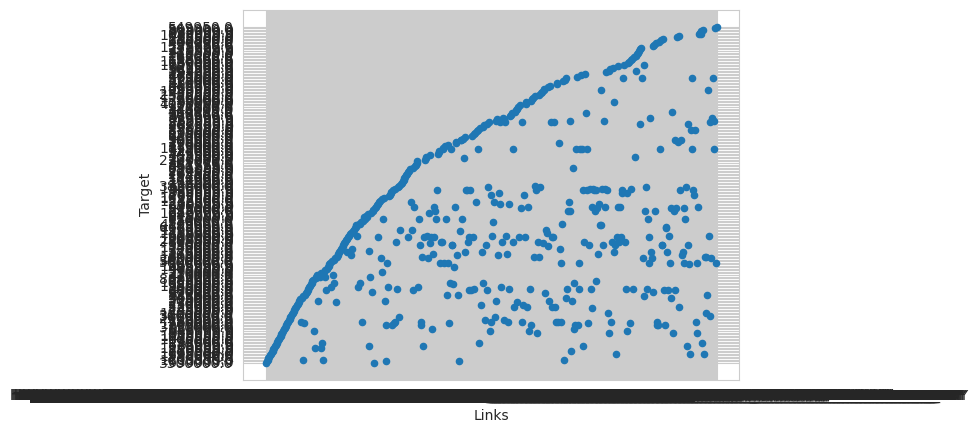

) missing from current font.tone_prework/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


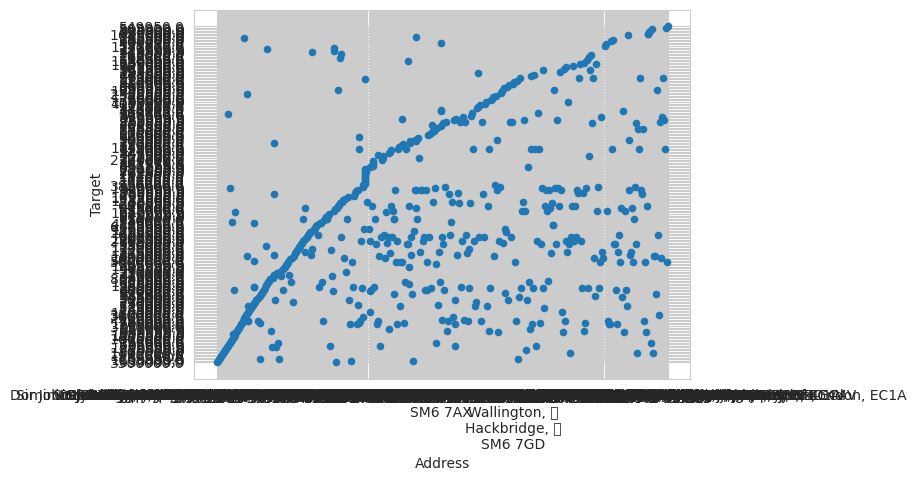

In [27]:
for each in df_original.columns[:2]:
    x = df_original.plot(kind='scatter',x=each, y="Target")
    plt.show()
    #print (each)

Links
Address
Description
Price
version_head
borough
version_indiv
link
Station_Prox
type
bedrooms
bathrooms
size
other_key_info
bullet_points
station_info
hold_type
short_description
long_description
postcode
compass
sq_ft
hold_type2
Target


TypeError: 'AxesSubplot' object is not iterable

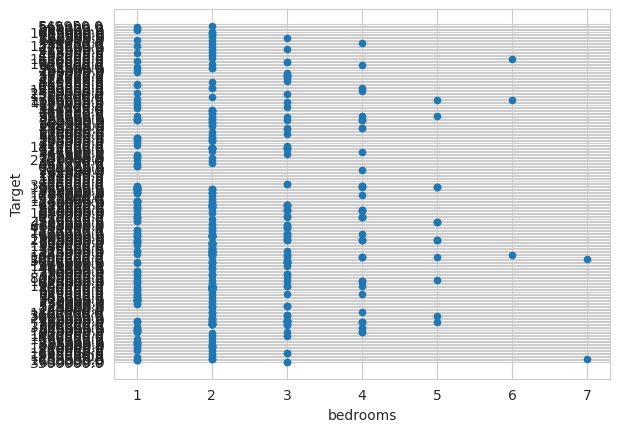

In [28]:
import numpy as np
for each in df_original.columns:
    print(each)

x = df_original.plot(kind='scatter',x='bedrooms', y="Target")
plt.yticks(np.arange(min(x), max(x)+1, 1000))
plt.show()


In [ ]:
#  Code to change the interval of ticks of axes
# using set_ticks() method

# Importing libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating x-value and y-value of data
x = [1, 2, 3, 4]
y = [0.1, 0.2, 0.3, 0.4]

# Creating a subplot with 2 row and 1 column
fig, (axes1, axes2) = plt.subplots(2, 1)

# Plotting first axes object i.e. axes1 and labeling
# its x and y axes
axes1.plot(x, y)
axes1.set_ylabel('y-axis')
axes1.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 1 and of y-axis
# to 0.1 of first axes i.e. axes1.
axes1.xaxis.set_ticks(np.arange(0, 5, 1))
axes1.yaxis.set_ticks(np.arange(0, 0.5, 0.1))

# Plotting first axes object i.e. axes1 and labeling its
# x and y axes
axes2.plot(x, y)
axes2.set_ylabel('y-axis')
axes2.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 0.5 and
# of y-axis to 0.05 of second axes i.e. axes2.
axes2.xaxis.set_ticks(np.arange(0, 4.5, 0.5))
axes2.yaxis.set_ticks(np.arange(0, 0.45, 0.05))


# Giving title to the figure object i.e. fig
fig.suptitle('set_ticks() Example')
fig.tight_layout(pad=3.0)

plt.show()

In [ ]:
df_original["Target"].describe()
xx.describe()
yy.dropna().describe()
df_original["Target"]

In [ ]:
subset = df_original[df_original["Target"] != 'POA']
#subset = df_original[df_original[['Target']].apply(lambda x: x[0].isdigit(), axis=1)]
pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)

print(subset.head())
subset.describe()
df_original["Target"].value_counts()
df_original["Target"].dtypes
df_original.dtypes

#df_original["Target"] = df_original["Target"].astype("float")
#df_original.dtypes

pd.to_numeric(df_original["Target"], 'coerce').dropna().astype(int)

xx = subset['bedrooms']
yy = subset['Target']

xx,yy
subset['Target'] = pd.to_numeric(subset["Target"], 'coerce').dropna().astype(int)
subset['Target'].info()

# Creating a subplot with 2 row and 1 column
fig, (axes3) = plt.subplots(1, 1, figsize=(10,7))

# Plotting first axes object i.e. axes1 and labeling
# its x and y axes
axes3.scatter(xx, yy)
axes3.set_ylabel('y-axis')
axes3.set_xlabel('x-axis')

# Setting the interval of ticks of x-axis to 1 and of y-axis
# to 0.1 of first axes i.e. axes1.
axes3.xaxis.set_ticks(np.arange(0, 10, 1))
#axes3.yaxis.set_ticks(np.arange(0, 0.5, 0.1))
#axes3.yaxis.set_ticks([0,10])
axes3.yaxis.set_ticks(np.arange(0, 10000000,500000))

plt.show()